# Phân loại các label theo nhóm tài khoản ngân hàng

**1. Payment Accounts**
| Label                                                                 |
|-----------------------------------------------------------------------|
| `current_accounts_final_label`                                         |
| `payroll_accounts_final_label`                                         |
| `junior_accounts_final_label`                                          |
| `more_particular_accounts_final_label`                                 |
| `particular_accounts_final_label`                                      |
| `particular_plus_accounts_final_label`                                 |
| `home_account_final_label`                                             |
| `payroll_final_label`                                                  |
| `e_account_final_label`                                                |

**2. Savings Accounts**
| Label                                                                 |
|-----------------------------------------------------------------------|
| `savings_account_final_label`                                          |
| `short_term_deposits_final_label`                                      |
| `medium_term_deposits_final_label`                                     |
| `long_term_deposits_final_label`                                       |

**3. Credit/Debit Cards & Loans**
| Label                                                                 |
|-----------------------------------------------------------------------|
| `credit_card_final_label`                                              |
| `direct_debit_final_label`                                             |
| `mortgage_final_label`                                                 |
| `loans_final_label`                                                    |

**4. Investments & Financial Services**
| Label                                                                 |
|-----------------------------------------------------------------------|
| `deriv_investments_final_label`                                        |
| `funds_final_label`                                                    |
| `securities_final_label`                                               |
| `guarantees_final_label`                                               |
| `pensions_final_label`                                                 |
| `pensions_2_final_label`                                               |
| `taxes_final_label`                                                    |


# Predict purpose

To predict and recommend the top 2 most suitable products (projects) for customers within each account/banking group, aiming to optimize selection and enhance personalized experience.

# Import and load data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math 
import seaborn as sns

In [2]:

df = pd.read_csv('data/processed/train.csv')




C:\Users\LEGION\AppData\Local\Temp\ipykernel_18220\2213304263.py:1: DtypeWarning: Columns (5,8,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/processed/train.csv')


In [3]:
df.info()

In [4]:

summary = []
for col in df.columns:
    col_data = df[col]
    col_info = {
        'Column': col,
        'Dtype': col_data.dtype,
        'Non-null Count': col_data.notnull().sum(),
        'Unique Count': col_data.nunique(),
        'Sample Values': col_data.dropna().unique()[:10] 
    }
    summary.append(col_info)

summary_df = pd.DataFrame(summary)

summary_df['Sample Values'] = summary_df['Sample Values'].apply(lambda x: ', '.join(map(str, x)))

summary_df

In [5]:
summary_df

# Payment Account

# Lọc dữ liệu khách hàng không giữ tài khoản thanh toán

## Mục tiêu
Tập trung vào nhóm khách hàng **không sở hữu bất kỳ tài khoản thanh toán nào**. Cụ thể, lọc các khách hàng không có giá trị `-1` ở tất cả các nhãn (label) liên quan đến tài khoản thanh toán.

## Các nhãn tài khoản thanh toán cần kiểm tra
- `current_accounts_final_label`
- `payroll_accounts_final_label`
- `junior_accounts_final_label`
- `more_particular_accounts_final_label`
- `particular_accounts_final_label`
- `particular_plus_accounts_final_label`
- `home_account_final_label`
- `payroll_final_label`
- `e_account_final_label`

## Yêu cầu lọc dữ liệu
- Chỉ giữ lại các dòng dữ liệu của khách hàng không có giá trị `-1` ở **tất cả các nhãn trên** (tức là khách hàng không giữ tài khoản thanh toán nào).
- Sau đó, **chỉ chọn các cột thuộc nhóm tài khoản thanh toán** để phân tích, các cột nhãn khác sẽ được loại bỏ.

---

In [5]:
payment_account_labels = [
    'current_accounts_final_label',
    'payroll_accounts_final_label',
    'junior_accounts_final_label',
    'more_particular_accounts_final_label',
    'particular_accounts_final_label',
    'particular_plus_accounts_final_label',
    'home_account_final_label',
    'payroll_final_label',
    'e_account_final_label'
]

customer_features = [
    'date', 'customer_id', 'employee_index', 'country_of_residence', 'gender',
    'age', 'registration_date', 'new_customer', 'seniority', 'primary_customer',
    'last_primary_date', 'customer_type', 'relation_type', 'residence_index',
    'foreigner_index', 'spouse_index', 'channel', 'deceased_index', 'address_type',
    'province_code', 'province_name', 'activity_index', 'income', 'segment'
]

In [6]:
def filter_data(df) :
    # Lấy khách hàng không có tài khoản thanh toán nào (không có giá trị -1)
    mask = ~(df[payment_account_labels] == -1).any(axis=1)
    
    # Các cột cần giữ lại
    columns_to_keep = customer_features + payment_account_labels
    
    # Lọc dữ liệu
    df_filtered = df.loc[mask, columns_to_keep]
    
    print(f"Tổng số khách hàng: {len(df):,}")
    print(f"Khách hàng KHÔNG sở hữu tài khoản thanh toán nào: {len(df_filtered):,}")
    
    # Kiểm tra distribution
    print("\n📊 Distribution check:")
    for col in payment_account_labels:
        unique_vals = df_filtered[col].unique()
        print(f"  {col}: {unique_vals}")
    
    return df_filtered

In [7]:
df_filtered = filter_data(df)

Tổng số khách hàng: 4,606,311
Khách hàng KHÔNG sở hữu tài khoản thanh toán nào: 442,736

📊 Distribution check:
  current_accounts_final_label: [0 1]
  payroll_accounts_final_label: [0 1]
  junior_accounts_final_label: [0 1]
  more_particular_accounts_final_label: [0 1]
  particular_accounts_final_label: [0 1]
  particular_plus_accounts_final_label: [0 1]
  home_account_final_label: [0]
  payroll_final_label: [0 1]
  e_account_final_label: [0 1]


In [8]:
df_filtered.info()

In [9]:

del df 

In [ ]:
df_filtered.info()

In [ ]:
#  print unique values of each columns (values)
for col in df_filtered.columns:
    unique_values = df_filtered[col].unique()
    print(f"Unique values in column '{col}': {unique_values}")  

# Data Overview and Notes

- `customer_id` and `date` are not features but important for evaluating customer behavior over time.
  - Drop `customer_id` during model training and add it back later for evaluation.
  - Perform feature engineering based on the `date` column.

- `gender` column contains missing (NaN) values.

- `age` values like `' 35'`, `' 23'`, `' 24'` should be converted to integers.

- `registration_date` should be converted to datetime.

- `seniority` values like `'    173'`, `'    153'` should be converted to integers.

- `primary_customer` is categorical.

- `customer_type` contains mixed data types such as `[1.0, 3.0, nan, '1.0', '3.0', '2.0', 'P', '1', '4', 2.0, '3', 4.0, '4.0', '2']` and is categorical.

- `address_type` column contains only one unique value.




In [13]:
df_filtered.info()

Fix data type

In [8]:


# gender → category
df_filtered['gender'] = df_filtered['gender'].fillna('Unknown').astype('category')

# age → int (giữ NaN)
df_filtered['age'] = df_filtered['age'].astype(str).str.strip()
df_filtered['age'] = pd.to_numeric(df_filtered['age'], errors='coerce').astype('Int64')

# registration_date → datetime
df_filtered['registration_date'] = pd.to_datetime(df_filtered['registration_date'], errors='coerce')

# seniority → int (giữ NaN, xử lý -999999)
df_filtered['seniority'] = df_filtered['seniority'].astype(str).str.strip()
df_filtered['seniority'] = pd.to_numeric(df_filtered['seniority'], errors='coerce').replace(-999999, np.nan).astype('Int64')

# primary_customer → category
df_filtered['primary_customer'] = df_filtered['primary_customer'].astype('category')

# customer_type → category
df_filtered['customer_type'] = df_filtered['customer_type'].astype(str).str.strip()
df_filtered['customer_type'] = df_filtered['customer_type'].replace('nan', np.nan).astype('category')

# date → datetime
df_filtered['date'] = pd.to_datetime(df_filtered['date'], errors='coerce')

# address_type → int (giữ NaN)
df_filtered['address_type'] = pd.to_numeric(df_filtered['address_type'], errors='coerce').astype('Int64')

# Kiểm tra lại kiểu dữ liệu
print(df_filtered.dtypes)


date                                    datetime64[ns]
customer_id                                      int64
employee_index                                  object
country_of_residence                            object
gender                                        category
age                                              Int64
registration_date                       datetime64[ns]
new_customer                                   float64
seniority                                        Int64
primary_customer                              category
last_primary_date                               object
customer_type                                 category
relation_type                                   object
residence_index                                 object
foreigner_index                                 object
spouse_index                                    object
channel                                         object
deceased_index                                  object
address_ty

In [14]:
for col in df_filtered.columns:
    unique_values = df_filtered[col].unique()
    print(f"Unique values in column '{col}': {unique_values[:10]}  type {df_filtered[col].dtype}")   
    print('==========================================')

# EDA 

## Target Variable 

In [ ]:


n_cols = 4
n_rows = math.ceil(len(payment_account_labels) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 3))
axes = axes.flatten()

for i, col in enumerate(payment_account_labels):
    counts = df_filtered[col].value_counts(dropna=False)
    axes[i].bar(counts.index.astype(str), counts.values, color=["skyblue", "orange"])
    axes[i].set_title(f"Distribution of {col}", fontsize=10)
    axes[i].set_xlabel("Value")
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=0)

# Remove unused subplots if target count not divisible by n_cols
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Plot ownership rates for all products
target_rates = df_filtered[payment_account_labels].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
target_rates.plot(kind="bar", color="skyblue")
plt.title("Customer Ownership Rate per Product", fontsize=14)
plt.ylabel("Rate")
plt.xticks(rotation=75)
plt.show()


Data imbalance -> Resample data 

In [ ]:
# Cột target (label) - tài khoản thanh toán
tar_cols = [
    'current_accounts_final_label',
    'payroll_accounts_final_label',
    'junior_accounts_final_label',
    'more_particular_accounts_final_label',
    'particular_accounts_final_label',
    'particular_plus_accounts_final_label',
    'home_account_final_label',
    'payroll_final_label',
    'e_account_final_label'
]

# Cột số (numeric)
num_cols = [
    'age',
    'seniority',
    'new_customer',
    'address_type',
    'province_code',
    'activity_index',
    'income'
]

# Cột phân loại (categorical / object / category)
cat_cols = [
    'employee_index',
    'country_of_residence',
    'gender',
    'primary_customer',
    'customer_type',
    'relation_type',
    'residence_index',
    'foreigner_index',
    'spouse_index',
    'channel',
    'deceased_index',
    'province_name',
    'segment'
]


## CATEGORICAL DATA

In [ ]:
import math
import matplotlib.pyplot as plt

n_cols = 4
n_rows = math.ceil(len(cat_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(30, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    counts = df_filtered[col].value_counts(dropna=False)
    axes[i].bar(counts.index.astype(str), counts.values, color="skyblue")
    axes[i].set_title(f"Distribution of {col}", fontsize=12)
    axes[i].set_xlabel("Value")
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=90)  # xoay nhãn 90°

# Xóa các subplot dư
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


## NUMERICAL DATA

In [15]:


n_cols = 3
n_rows = math.ceil(len(num_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(df_filtered[col].dropna(), kde=True, ax=axes[i], color="skyblue", bins=30)
    axes[i].set_title(f"Distribution of {col}", fontsize=12)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

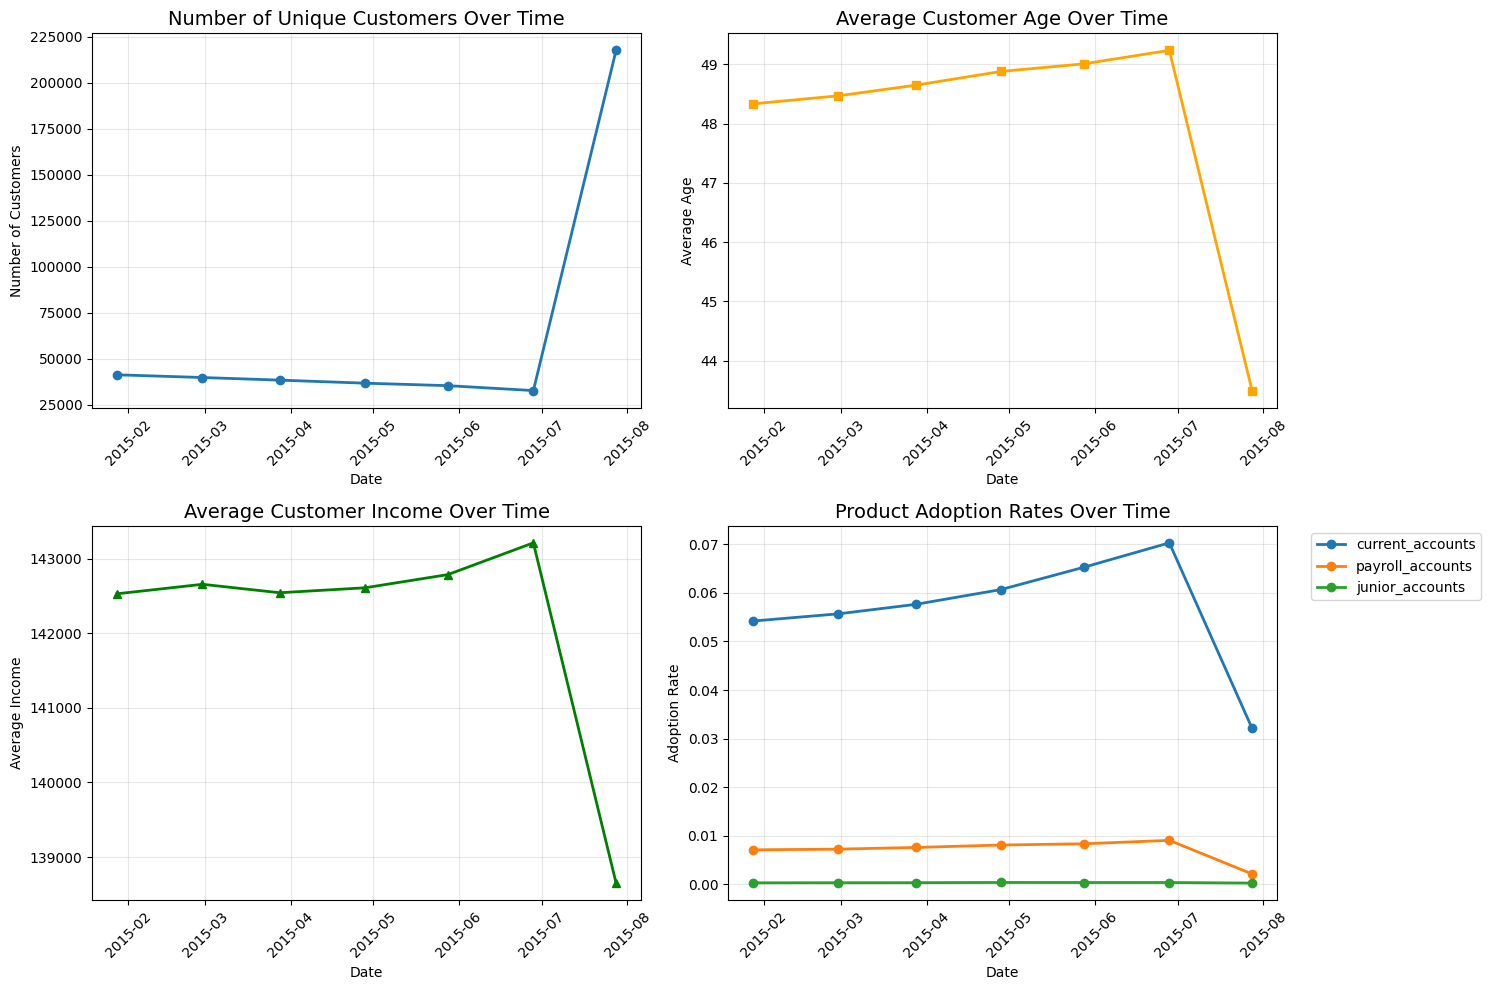


📊 TIME SERIES ANALYSIS SUMMARY
Monthly Customer Statistics:
            customer_id    age     income  seniority
year_month                                          
2015-01           41410  48.33  142529.23     114.25
2015-02           39931  48.47  142656.36     114.44
2015-03           38512  48.65  142543.22     114.96
2015-04           36854  48.88  142609.68      116.0
2015-05           35507  49.01  142786.28     116.81
2015-06           32842  49.23  143211.96     117.99
2015-07          217680   43.5  138652.18      83.28


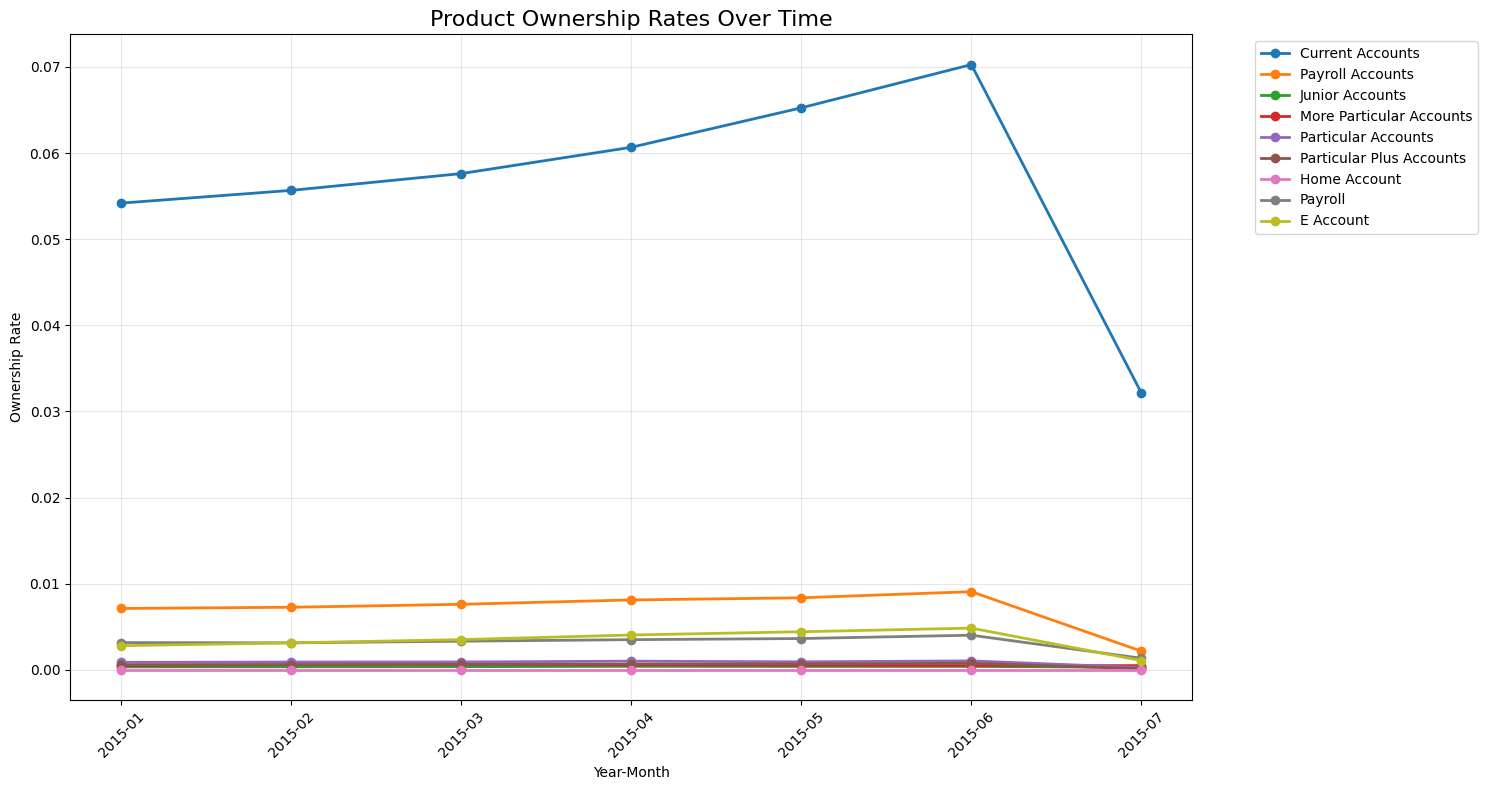

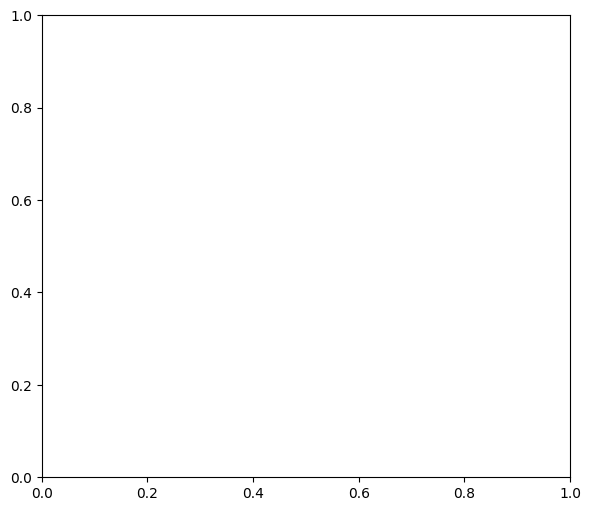

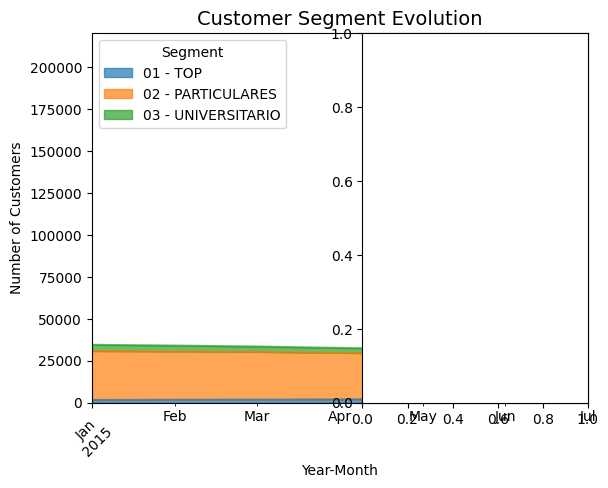

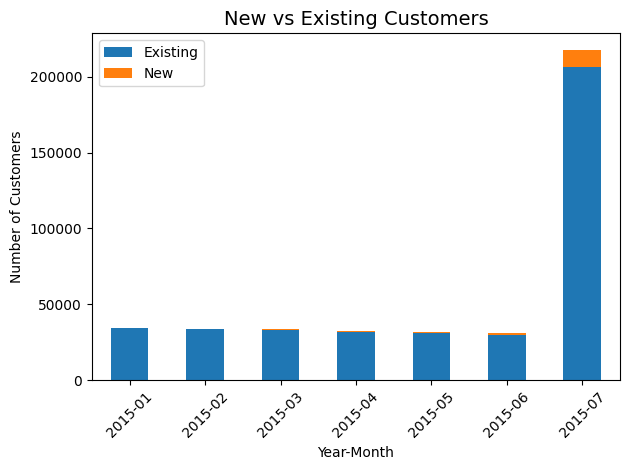


🔗 FEATURE CORRELATION CHANGES OVER TIME
Early period: 2015-01-28 00:00:00 to 2015-06-28 00:00:00
Late period: 2015-06-28 00:00:00 to 2015-07-28 00:00:00

Correlation changes (Late - Early period):
           current_accounts_final_label  payroll_accounts_final_label  \
age                               0.043                         0.035   
income                            0.007                         0.006   
seniority                         0.079                         0.051   

           junior_accounts_final_label  more_particular_accounts_final_label  \
age                              0.018                                 0.010   
income                           0.003                                 0.001   
seniority                       -0.005                                 0.003   

           particular_accounts_final_label  \
age                                  0.001   
income                              -0.003   
seniority                           -0.002   

   

In [ ]:

# Ensure date column is datetime
df_filtered['date'] = pd.to_datetime(df_filtered['date'])

# =============================
# 1. PLOT NUMBER OF CUSTOMERS OVER TIME
# =============================
plt.figure(figsize=(15, 10))

# Plot 1: Customer count over time
plt.subplot(2, 2, 1)
customer_count_by_date = df_filtered.groupby('date')['customer_id'].nunique()
plt.plot(customer_count_by_date.index, customer_count_by_date.values, marker='o', linewidth=2)
plt.title('Number of Unique Customers Over Time', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# =============================
# 2. PLOT AVERAGE AGE OVER TIME
# =============================
plt.subplot(2, 2, 2)
avg_age_by_date = df_filtered.groupby('date')['age'].mean()
plt.plot(avg_age_by_date.index, avg_age_by_date.values, marker='s', color='orange', linewidth=2)
plt.title('Average Customer Age Over Time', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Average Age')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# =============================
# 3. PLOT AVERAGE INCOME OVER TIME
# =============================
plt.subplot(2, 2, 3)
avg_income_by_date = df_filtered.groupby('date')['income'].mean()
plt.plot(avg_income_by_date.index, avg_income_by_date.values, marker='^', color='green', linewidth=2)
plt.title('Average Customer Income Over Time', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Average Income')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# =============================
# 4. PLOT PRODUCT ADOPTION RATES OVER TIME
# =============================
plt.subplot(2, 2, 4)
# Calculate adoption rate for each product over time
for i, product in enumerate(payment_account_labels[:3]):  # Show top 3 products only
    adoption_rate = df_filtered.groupby('date')[product].mean()
    plt.plot(adoption_rate.index, adoption_rate.values, 
             marker='o', linewidth=2, label=product.replace('_final_label', ''))

plt.title('Product Adoption Rates Over Time', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Adoption Rate')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# =============================
# 5. DETAILED TIME SERIES ANALYSIS
# =============================
print("\n📊 TIME SERIES ANALYSIS SUMMARY")
print("="*50)

# Monthly aggregation
df_filtered['year_month'] = df_filtered['date'].dt.to_period('M')

# Customer demographics over time
monthly_stats = df_filtered.groupby('year_month').agg({
    'customer_id': 'nunique',
    'age': 'mean',
    'income': 'mean',
    'seniority': 'mean'
}).round(2)

print("Monthly Customer Statistics:")
print(monthly_stats.head(10))

# =============================
# 6. PRODUCT OWNERSHIP TRENDS
# =============================
plt.figure(figsize=(15, 8))

# Calculate monthly product ownership rates
monthly_product_stats = df_filtered.groupby('year_month')[payment_account_labels].mean()

# Plot all products
for product in payment_account_labels:
    plt.plot(monthly_product_stats.index.astype(str), 
             monthly_product_stats[product], 
             marker='o', linewidth=2, 
             label=product.replace('_final_label', '').replace('_', ' ').title())

plt.title('Product Ownership Rates Over Time', fontsize=16)
plt.xlabel('Year-Month')
plt.ylabel('Ownership Rate')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# =============================
# 7. CUSTOMER SEGMENT EVOLUTION
# =============================
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
# Customer distribution by segment over time
segment_evolution = df_filtered.groupby(['year_month', 'segment']).size().unstack(fill_value=0)
segment_evolution.plot(kind='area', stacked=True, alpha=0.7)
plt.title('Customer Segment Evolution', fontsize=14)
plt.xlabel('Year-Month')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.legend(title='Segment')

plt.subplot(1, 2, 2)
# New vs existing customers over time
new_customer_trend = df_filtered.groupby(['year_month', 'new_customer']).size().unstack(fill_value=0)
new_customer_trend.plot(kind='bar', stacked=True)
plt.title('New vs Existing Customers', fontsize=14)
plt.xlabel('Year-Month')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.legend(['Existing', 'New'])

plt.tight_layout()
plt.show()

# =============================
# 8. CORRELATION ANALYSIS OVER TIME
# =============================
print("\n🔗 FEATURE CORRELATION CHANGES OVER TIME")
print("="*50)

# Split data into early and late periods
df_filtered_sorted = df_filtered.sort_values('date')
mid_point = len(df_filtered_sorted) // 2

early_period = df_filtered_sorted.iloc[:mid_point]
late_period = df_filtered_sorted.iloc[mid_point:]

print(f"Early period: {early_period['date'].min()} to {early_period['date'].max()}")
print(f"Late period: {late_period['date'].min()} to {late_period['date'].max()}")

# Compare correlations
numeric_features = ['age', 'income', 'seniority']
early_corr = early_period[numeric_features + payment_account_labels].corr()
late_corr = late_period[numeric_features + payment_account_labels].corr()

print("\nCorrelation changes (Late - Early period):")
corr_diff = late_corr - early_corr
print(corr_diff.loc[numeric_features, payment_account_labels].round(3))

# DATA PREPROCESSING STRATEGY 

## 1. Numerical columns (cột số)
| Cột | Mô tả | Chiến lược xử lý |
|-----|-------|------------------|
| `age` | Tuổi khách hàng | - Thay giá trị bất thường (age < 18 hoặc > 100) bằng median/giá trị hợp lý.<br>- Điền giá trị thiếu bằng median. |
| `seniority_months` | Thâm niên khách hàng tại ngân hàng (tháng) | - Chuyển giá trị âm hoặc bất hợp lý về 0.<br>- Điền giá trị thiếu bằng median. |
| `new_customer_flag` | Khách hàng mới (1 = mới trong 6 tháng) | - Điền giá trị thiếu bằng 0.<br>- Giữ dạng số nguyên 0/1. |
| `address_type` | Loại địa chỉ (1 = địa chỉ chính) | - Nếu chỉ có một giá trị duy nhất, có thể drop.<br>- Nếu còn đa dạng, giữ nguyên dạng số nguyên. |
| `province_code` | Mã tỉnh | - Điền giá trị thiếu bằng mode.<br>- Giữ dạng số nguyên. |
| `activity_index` | Mức độ hoạt động (1 = active, 0 = inactive) | - Điền giá trị thiếu bằng 1.<br>- Chuyển về int. |
| `household_income` | Thu nhập hộ gia đình | - Xử lý giá trị ngoại lệ quá lớn (dùng winsorization hoặc log-transform).<br>- Điền giá trị thiếu bằng median theo `customer_segment` hoặc `province_code`. |

---

## 2. Categorical columns (cột phân loại)
| Cột | Mô tả | Chiến lược xử lý |
|-----|-------|------------------|
| `employee_index` | Loại nhân viên | Chuẩn hóa giá trị (A, B, F, N, P). Điền giá trị thiếu bằng 'N'. |
| `country_of_residence` | Quốc gia cư trú | Giữ nguyên, điền giá trị thiếu bằng mode. |
| `gender` | Giới tính | Chuẩn hóa về 'M', 'F', 'Unknown'. |
| `primary_customer_flag` | Khách hàng chính | Điền thiếu bằng mode, chuyển về int. |
| `customer_type` | Loại khách hàng | Chuẩn hóa về nhóm chính (1, 2, 3, 4, P). |
| `relation_type` | Loại quan hệ | Chuẩn hóa về A, I, P, R. |
| `residence_index` | Sống cùng quốc gia với ngân hàng | Chuẩn hóa 'S' (Yes), 'N' (No). |
| `foreigner_index` | Người nước ngoài | Chuẩn hóa 'S' (Yes), 'N' (No). |
| `spouse_index` | Vợ/chồng nhân viên | Chuẩn hóa 1 = Có, 0 = Không. |
| `join_channel` | Kênh gia nhập | Điền thiếu bằng mode, có thể gộp nhóm kênh ít xuất hiện. |
| `deceased_flag` | Đã qua đời | Chuẩn hóa 'S' (Yes), 'N' (No). |
| `province_name` | Tên tỉnh | Đồng bộ hóa với `province_code`. |
| `customer_segment` | Phân khúc khách hàng | Chuẩn hóa về: 01-VIP, 02-Individuals, 03-University. |

---

## 3. Target columns (cột mục tiêu)
| Cột | Mô tả | Chiến lược xử lý |
|-----|-------|------------------|
| `*_label` | Nhãn sản phẩm (1 = sở hữu, 0 = không) | Giữ nguyên, đảm bảo dạng int (0/1). |

---

## 4. Các bước xử lý tổng quát
1. **Chuẩn hóa kiểu dữ liệu**: datetime cho ngày, category cho phân loại, numeric cho số.
2. **Xử lý giá trị thiếu**:
   - Numerical → median/mode theo nhóm.
   - Categorical → mode hoặc nhóm 'Unknown'.
3. **Xử lý giá trị bất thường**:
   - Loại hoặc sửa các giá trị ngoài phạm vi hợp lý.
   - Winsorization hoặc log-transform cho thu nhập.
4. **Chuẩn hóa giá trị phân loại**: viết hoa/thường đồng nhất, gộp nhóm nhỏ.
5. **Tạo biến mới nếu cần**: ví dụ nhóm tuổi, nhóm thu nhập.
6. **Mã hóa dữ liệu phân loại**: One-hot encoding hoặc label encoding tùy mô hình.
7. **Chuẩn hóa/scale numerical features** nếu dùng mô hình nhạy cảm với scale (SVM, logistic regression, NN).



In [16]:
import pandas as pd
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer

# =============================
# 1. Custom transformer: Handle customer features
# =============================
class CustomerFeatureTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        df = X.copy()
        
        # Date handling
        date_cols = ['date', 'registration_date', 'last_primary_date']
        for col in date_cols:
            if col in df.columns:
                df[col] = pd.to_datetime(df[col], errors='coerce')
        
        # Age
        if 'age' in df.columns:
            df['age'] = pd.to_numeric(df['age'], errors='coerce')
            age_median = df['age'].median()
            df['age'] = df['age'].fillna(age_median)
            df['age'] = np.where((df['age'] < 18) | (df['age'] > 100), age_median, df['age'])
        
        # Seniority
        if 'seniority' in df.columns:
            df['seniority'] = pd.to_numeric(df['seniority'], errors='coerce').fillna(0)
            df['seniority'] = np.where(df['seniority'] < 0, 0, df['seniority'])
        
        # Income
        if 'income' in df.columns:
            df['income'] = pd.to_numeric(df['income'], errors='coerce')
            if 'segment' in df.columns and 'province_code' in df.columns:
                income_median_by_group = df.groupby(['segment', 'province_code'])['income'].transform('median')
                df['income'] = df['income'].fillna(income_median_by_group)
            df['income'] = df['income'].fillna(df['income'].median())
            q01, q99 = df['income'].quantile([0.01, 0.99])
            df['income'] = np.clip(df['income'], q01, q99)
        
        # Province code
        if 'province_code' in df.columns:
            mode_val = df['province_code'].mode()
            df['province_code'] = df['province_code'].fillna(mode_val[0] if not mode_val.empty else 0)
        
        # Drop address_type if only one unique value
        if 'address_type' in df.columns and df['address_type'].nunique() <= 1:
            df = df.drop(columns=['address_type'])
        
        # Fill categorical
        fill_map = {
            'gender': 'Unknown',
            'employee_index': 'N',
            'country_of_residence': 'ES',
            'customer_type': 'Unknown',
            'relation_type': 'R',
            'residence_index': 'N',
            'foreigner_index': 'N',
            'deceased_index': 'N',
            'province_name': 'UNKNOWN',
            'segment': '02 - PARTICULARES',
            'spouse_index': 'N',
            'new_customer': '0',
            'activity_index': '1'
        }
        for col, val in fill_map.items():
            if col in df.columns:
                df[col] = df[col].astype(str).replace('nan', val).fillna(val)
        
        if 'channel' in df.columns:
            mode_val = df['channel'].mode()
            df['channel'] = df['channel'].fillna(mode_val[0] if not mode_val.empty else 'KAT')
        
        if 'primary_customer' in df.columns:
            df['primary_customer'] = df['primary_customer'].fillna(1).astype(int)
        
        return df

# =============================
# 2. Custom transformer: Feature engineering
# =============================
class FeatureEngineeringTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        df = X.copy()
        
        # Age group
        if 'age' in df.columns:
            df['age_group'] = pd.cut(df['age'],
                                     bins=[0, 25, 35, 45, 55, 65, 100],
                                     labels=['18-25', '26-35', '36-45', '46-55', '56-65', '65+'])
            # Convert to string to avoid issues with ordinal encoding
            df['age_group'] = df['age_group'].astype(str)
            
        # Income group
        if 'income' in df.columns:
            try:
                df['income_group'] = pd.qcut(df['income'], q=5,
                                             labels=['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High'])
                df['income_group'] = df['income_group'].astype(str)
            except:
                df['income_group'] = 'Unknown'
        
        # Seniority group
        if 'seniority' in df.columns:
            df['seniority_group'] = pd.cut(df['seniority'],
                                           bins=[-1, 0, 12, 36, 60, 1000],
                                           labels=['New', '0-1yr', '1-3yr', '3-5yr', '5yr+'])
            df['seniority_group'] = df['seniority_group'].astype(str)
        
        # Registration year & days since registration
        if 'registration_date' in df.columns and 'date' in df.columns:
            df['registration_year'] = df['registration_date'].dt.year
            df['days_since_registration'] = (df['date'] - df['registration_date']).dt.days
            df['registration_year'] = df['registration_year'].fillna(df['registration_year'].median())
            df['days_since_registration'] = df['days_since_registration'].fillna(df['days_since_registration'].median())
        
        return df

# =============================
# 3. Build pipeline
# =============================
categorical_cols = ['employee_index', 'country_of_residence', 'gender', 'customer_type',
                    'relation_type', 'residence_index', 'foreigner_index', 'channel',
                    'deceased_index', 'province_name', 'segment', 'age_group', 'income_group',
                    'seniority_group', 'new_customer', 'activity_index', 'spouse_index']
integer_categorical_cols = ['primary_customer']
numerical_cols = ['age', 'seniority', 'province_code', 'income', 'registration_year', 'days_since_registration']

# Preprocessor
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1))
])

numerical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

preprocessor = ColumnTransformer(transformers=[
    ("cat", categorical_transformer, categorical_cols),
    ("int_cat", "passthrough", integer_categorical_cols),
    ("num", numerical_transformer, numerical_cols)
], remainder="drop")

# Final pipeline
full_pipeline = Pipeline(steps=[
    ("customer_features", CustomerFeatureTransformer()),
    ("feature_engineering", FeatureEngineeringTransformer()),
    ("preprocessor", preprocessor)
])


# Modeling

## Define map@k

In [ ]:
def apk(actual, predicted, k=7):
    """
    Computes the average precision at k.
    
    Parameters:
    actual : list - A list of actual relevant items
    predicted : list - A list of predicted items ordered by rank
    k : int - The maximum number of predicted elements
    
    Returns:
    score : double - The average precision at k
    """
    if len(predicted) > k:
        predicted = predicted[:k]

    score = 0.0
    num_hits = 0.0

    for i, p in enumerate(predicted):
        if p in actual and p not in predicted[:i]:
            num_hits += 1.0
            score += num_hits / (i + 1.0)

    if not actual:
        return 0.0

    return score / min(len(actual), k)

def mapk(actual, predicted, k=7):
    """
    Computes the mean average precision at k.
    
    Parameters:
    actual : list of lists - A list of lists of actual relevant items
    predicted : list of lists - A list of lists of predicted items ordered by rank
    k : int - The maximum number of predicted elements
    
    Returns:
    score : double - The mean average precision at k
    """
    return np.mean([apk(a, p, k) for a, p in zip(actual, predicted)])

def evaluate_recommendations(actual_products, predicted_products, k=7):
    """
    Evaluate recommendation system using MAP@k
    
    Parameters:
    actual_products : dict - {user_id: [list of actual products]}
    predicted_products : dict - {user_id: [list of predicted products]}
    k : int - Number of recommendations to consider
    
    Returns:
    map_score : float - MAP@k score
    """
    actual_list = []
    predicted_list = []
    
    for user_id in actual_products.keys():
        if user_id in predicted_products:
            actual_list.append(actual_products[user_id])
            predicted_list.append(predicted_products[user_id])
        else:
            actual_list.append(actual_products[user_id])
            predicted_list.append([])  # No predictions for this user
    
    map_score = mapk(actual_list, predicted_list, k)
    
    print(f" MAP@{k}: {map_score:.4f}")
    print(f" Users evaluated: {len(actual_list):,}")
    print(f" Coverage: {len([p for p in predicted_list if p]) / len(predicted_list):.2%}")
    
    return map_score

In [19]:

def precision_at_k(actual, predicted, k=7):
    """
    Computes the precision at k.

    Parameters:
    actual : list - A list of actual relevant items
    predicted : list - A list of predicted items ordered by rank
    k : int - The maximum number of predicted elements

    Returns:
    precision : double - The precision at k
    """
    if len(predicted) > k:
        predicted = predicted[:k]
    
    if not predicted:
        return 0.0
    
    # Đếm số dự đoán đúng trong top-k
    correct = len(set(predicted) & set(actual))
    return correct / k


def evaluate_recommendations_with_precision(actual_products, predicted_products, k=7):
    """
    Evaluate recommendation system using MAP@k and Precision@k.

    Parameters:
    actual_products : dict - {user_id: [list of actual products]}
    predicted_products : dict - {user_id: [list of predicted products]}
    k : int - Number of recommendations to consider

    Returns:
    metrics : dict - {'MAP@k': ..., 'Precision@k': ...}
    """
    actual_list = []
    predicted_list = []

    for user_id in actual_products.keys():
        if user_id in predicted_products:
            actual_list.append(actual_products[user_id])
            predicted_list.append(predicted_products[user_id])
        else:
            actual_list.append(actual_products[user_id])
            predicted_list.append([])  # No predictions for this user

    # MAP@k
    map_score = mapk(actual_list, predicted_list, k)

    # Precision@k trung bình
    precision_scores = [
        precision_at_k(a, p, k) for a, p in zip(actual_list, predicted_list)
    ]
    avg_precision = np.mean(precision_scores)

    print(f" MAP@{k}: {map_score:.4f}")
    print(f" Precision@{k}: {avg_precision:.4f}")
    print(f" Users evaluated: {len(actual_list):,}")
    print(f" Coverage: {len([p for p in predicted_list if p]) / len(predicted_list):.2%}")

    return {f"MAP@{k}": map_score, f"Precision@{k}": avg_precision}

In [20]:
# Ví dụ giả lập
actual_products = {
    1: ['A', 'B'],
    2: ['C'],
    3: ['D', 'E', 'F']
}

predicted_products = {
    1: ['A', 'C', 'D'],
    2: ['C', 'E', 'B'],
    3: ['E', 'G', 'H']
}

evaluate_recommendations_with_precision(actual_products, predicted_products, k=2)


## Processing test data

In [ ]:
test_10_2015 = pd.read_csv('data/processed/test_10_2015.csv')
test_11_2015 = pd.read_csv('data/processed/test_11_2015.csv')
test_12_2015 = pd.read_csv('data/processed/test_12_2015.csv')

In [23]:
test_10_2015 = filter_data(test_10_2015)
test_11_2015 = filter_data(test_11_2015)
test_12_2015 = filter_data(test_12_2015)

In [28]:
# === Train ===
X_train = df_filtered.drop(columns=tar_cols)
y_train = df_filtered[tar_cols]

full_pipeline.fit(X_train)  
X_train_processed = full_pipeline.transform(X_train)

# === Test ===
X_test_10 = test_10_2015.drop(columns=tar_cols)
y_test_10 = test_10_2015[tar_cols]
X_test_10_processed = full_pipeline.transform(X_test_10)

X_test_11 = test_11_2015.drop(columns=tar_cols)
y_test_11 = test_11_2015[tar_cols]
X_test_11_processed = full_pipeline.transform(X_test_11)

X_test_12 = test_12_2015.drop(columns=tar_cols)
y_test_12 = test_12_2015[tar_cols]
X_test_12_processed = full_pipeline.transform(X_test_12)

print(f"Train shape: {X_train_processed.shape}")
print(f"Test 10 shape: {X_test_10_processed.shape}")
print(f"Test 11 shape: {X_test_11_processed.shape}")
print(f"Test 12 shape: {X_test_12_processed.shape}")

## Logistic + SMOTE

In [ ]:
print("📊 CHECKING CLASS IMBALANCE:")
print("="*50)

for col in tar_cols:
    pos_rate = y_train[col].mean()
    neg_count = (y_train[col] == 0).sum()
    pos_count = (y_train[col] == 1).sum()
     
    print(f"{col}:")
    print(f"  Positive rate: {pos_rate:.4f} ({pos_count:,} / {len(y_train):,})")
    print(f"  Negative: {neg_count:,}, Positive: {pos_count:,}")
    print(f"  Imbalance ratio: {neg_count/pos_count if pos_count > 0 else 'inf'}:1")
    print()

In [31]:
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

estimators = []
product_names = tar_cols

for i, col in enumerate(product_names):
    y_col = y_train[col].values
    X_data = X_train_processed

    if len(np.unique(y_col)) < 2:
        print(f"Bỏ qua {col} vì chỉ có 1 class")
        estimators.append(None)
        continue

    smote = SMOTE(random_state=42)
    X_res, y_res = smote.fit_resample(X_data, y_col)

    clf = LogisticRegression(
        solver='lbfgs', max_iter=1000, n_jobs=-1
    )
    clf.fit(X_res, y_res)
    estimators.append(clf)

print("\nHuấn luyện xong tất cả nhãn.")


def predict_topk(X_processed, k=2):
    y_proba = []
    for est in estimators:
        if est is None:
            y_proba.append(np.zeros(X_processed.shape[0]))
        else:
            y_proba.append(est.predict_proba(X_processed)[:, 1])
    y_proba = np.array(y_proba).T  # (n_samples, n_products)

    topk_idx = np.argsort(y_proba, axis=1)[:, -k:][:, ::-1]
    topk_products = [[product_names[i] for i in row] for row in topk_idx]
    return topk_products

def evaluate_month(X_processed, y_true, month_label, k=2):
    preds = predict_topk(X_processed, k=k)
    actual_products = {
        idx: list(np.array(product_names)[np.where(row == 1)[0]])
        for idx, row in enumerate(y_true.values)
    }
    predicted_products = {idx: p for idx, p in enumerate(preds)}

    print(f"\n[{month_label}]")
    metrics = evaluate_recommendations_with_precision(
        actual_products, predicted_products, k=k
    )
    return metrics

# =========================
#  Chạy đánh giá cho 3 tháng
# =========================
results = {}
results["2015-10"] = evaluate_month(X_test_10_processed, y_test_10, "2015-10", k=2)
results["2015-11"] = evaluate_month(X_test_11_processed, y_test_11, "2015-11", k=2)
results["2015-12"] = evaluate_month(X_test_12_processed, y_test_12, "2015-12", k=2)

df_results = pd.DataFrame(results).T
print("\n=== Tổng hợp kết quả ===")
print(df_results)

## Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

multi_rf = MultiOutputClassifier(rf, n_jobs=-1)
multi_rf.fit(X_train_processed, y_train)
#  check 100% 
# ====== Predict probabilities ======
y_proba_10 = multi_rf.predict_proba(X_test_10_processed)
y_proba_11 = multi_rf.predict_proba(X_test_11_processed)
y_proba_12 = multi_rf.predict_proba(X_test_12_processed)

print(y_proba_10)

import numpy as np

def get_proba_matrix(y_proba_list):
    proba_matrix = []
    for p in y_proba_list:
        if p.shape[1] == 2:  # có cả class 0 và 1
            proba_matrix.append(p[:, 1])
        else:
            # chỉ có 1 class trong train, mặc định xác suất mua = 0
            proba_matrix.append(np.zeros(p.shape[0]))
    return np.vstack(proba_matrix).T


y_proba_10 = get_proba_matrix(y_proba_10)
y_proba_11 = get_proba_matrix(y_proba_11)
y_proba_12 = get_proba_matrix(y_proba_12)

product_labels = tar_cols

def get_top_k_products(y_proba, labels, k=2):
    top_k_preds = []
    for probs in y_proba:
        top_idx = np.argsort(probs)[::-1][:k]  
        top_k_preds.append([labels[i] for i in top_idx])
    return top_k_preds

preds_10 = get_top_k_products(y_proba_10, product_labels, k=2)
preds_11 = get_top_k_products(y_proba_11, product_labels, k=2)
preds_12 = get_top_k_products(y_proba_12, product_labels, k=2)

actual_10 = dict(zip(test_10_2015['customer_id'], y_test_10.apply(lambda row: [col for col in y_test_10.columns if row[col] == 1], axis=1)))
predicted_10 = dict(zip(test_10_2015['customer_id'], preds_10))

actual_11 = dict(zip(test_11_2015['customer_id'], y_test_11.apply(lambda row: [col for col in y_test_11.columns if row[col] == 1], axis=1)))
predicted_11 = dict(zip(test_11_2015['customer_id'], preds_11))

actual_12 = dict(zip(test_12_2015['customer_id'], y_test_12.apply(lambda row: [col for col in y_test_12.columns if row[col] == 1], axis=1)))
predicted_12 = dict(zip(test_12_2015['customer_id'], preds_12))

# ====== Evaluate ======
print("Tháng 10:")
evaluate_recommendations_with_precision(actual_10, predicted_10, k=2)

print("Tháng 11:")
evaluate_recommendations_with_precision(actual_11, predicted_11, k=2)

print("Tháng 12:")
evaluate_recommendations_with_precision(actual_12, predicted_12, k=2)


In [ ]:
y_proba_10

## Xgboost 

In [ ]:
from xgboost import XGBClassifier
from sklearn.multioutput import MultiOutputClassifier
import numpy as np

# === Train XGBoost ===
xgb_model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    base_score=0.5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

multi_xgb = MultiOutputClassifier(xgb_model, n_jobs=-1)
multi_xgb.fit(X_train_processed, y_train)

# === Predict probabilities ===
y_proba_10 = np.column_stack([
    est.predict_proba(X_test_10_processed)[:, 1] for est in multi_xgb.estimators_
])
y_proba_11 = np.column_stack([
    est.predict_proba(X_test_11_processed)[:, 1] for est in multi_xgb.estimators_
])
y_proba_12 = np.column_stack([
    est.predict_proba(X_test_12_processed)[:, 1] for est in multi_xgb.estimators_
])

# === Hàm lấy top-k sản phẩm ===
def get_top_k_products(y_proba, labels, k=2):
    top_k_preds = []
    for probs in y_proba:
        top_idx = np.argsort(probs)[::-1][:k]
        top_k_preds.append([labels[i] for i in top_idx])
    return top_k_preds

labels = list(y_train.columns)

preds_10 = get_top_k_products(y_proba_10, labels, k=2)
preds_11 = get_top_k_products(y_proba_11, labels, k=2)
preds_12 = get_top_k_products(y_proba_12, labels, k=2)

# === Ground truth ===
actual_10 = dict(zip(
    test_10_2015['customer_id'],
    y_test_10.apply(lambda row: [col for col in y_test_10.columns if row[col] == 1], axis=1)
))
predicted_10 = dict(zip(test_10_2015['customer_id'], preds_10))

actual_11 = dict(zip(
    test_11_2015['customer_id'],
    y_test_11.apply(lambda row: [col for col in y_test_11.columns if row[col] == 1], axis=1)
))
predicted_11 = dict(zip(test_11_2015['customer_id'], preds_11))

actual_12 = dict(zip(
    test_12_2015['customer_id'],
    y_test_12.apply(lambda row: [col for col in y_test_12.columns if row[col] == 1], axis=1)
))
predicted_12 = dict(zip(test_12_2015['customer_id'], preds_12))

# === Evaluate ===
print("Tháng 10:")
evaluate_recommendations_with_precision(actual_10, predicted_10, k=2)

print("Tháng 11:")
evaluate_recommendations_with_precision(actual_11, predicted_11, k=2)

print("Tháng 12:")
evaluate_recommendations_with_precision(actual_12, predicted_12, k=2)
